# Diamonds Dataset
The dataset contaibs information on diamonds by their cut, color, clarity, price, and other attributes.

## Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds.

## Content
`price`: price in US dollars (\$326--\$18,823)

`carat`: weight of the diamond (0.2--5.01)

`cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

`color`: diamond colour, from J (worst) to D (best)

`clarity`: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

`x`: length in mm (0--10.74)

`y`: width in mm (0--58.9)

`z`: depth in mm (0--31.8)

`depth`: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

`table`: width of top of diamond relative to widest point (43--95)

The `.csv` file can be downloaded from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds).

In [ ]:
!wget https://www.kaggle.com/datasets/shivam2503/diamonds#:~:text=file_download-,Download,-(751%20kB

In [16]:
diamonds <- read.csv("diamonds.csv")
names(diamonds)
dim(diamonds)
?diamonds
head(diamonds)
summary(diamonds)

[1] "X"       "carat"   "cut"     "color"   "clarity" "depth"   "table"  
 [8] "price"   "x"       "y"       "z"

[1] 53940    11

,X,carat,cut,color,clarity,depth,table,price,x,y,z
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
5,5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
6,6,0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


       X             carat            cut               color          
 Min.   :    1   Min.   :0.2000   Length:53940       Length:53940      
 1st Qu.:13486   1st Qu.:0.4000   Class :character   Class :character  
 Median :26970   Median :0.7000   Mode  :character   Mode  :character  
 Mean   :26970   Mean   :0.7979                                        
 3rd Qu.:40455   3rd Qu.:1.0400                                        
 Max.   :53940   Max.   :5.0100                                        
   clarity              depth           table           price      
 Length:53940       Min.   :43.00   Min.   :43.00   Min.   :  326  
 Class :character   1st Qu.:61.00   1st Qu.:56.00   1st Qu.:  950  
 Mode  :character   Median :61.80   Median :57.00   Median : 2401  
                    Mean   :61.75   Mean   :57.46   Mean   : 3933  
                    3rd Qu.:62.50   3rd Qu.:59.00   3rd Qu.: 5324  
                    Max.   :79.00   Max.   :95.00   Max.   :18823  
       x            

# Linear Regression

Importing packages containing definitions of objects, including functions and datasets.

In [2]:
install.packages("ISLR", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Fitting of a linear model is done using the `lm()` function. The form of the model is determined by a formula (that is, an object of the formula class).

The model frormula:
$$ Y=β0+β1X+ϵ $$


### Predicting 'price' based on 'carat'

In [28]:
# Predicting 'price' based on 'carat'
fit_simple <- lm(price ~ carat, data = diamonds)

# Summary of the model
summary(fit_simple)


Call:
lm(formula = price ~ carat, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-18585.3   -804.8    -18.9    537.4  12731.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2256.36      13.06  -172.8   <2e-16 ***
carat        7756.43      14.07   551.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1549 on 53938 degrees of freedom
Multiple R-squared:  0.8493,	Adjusted R-squared:  0.8493 
F-statistic: 3.041e+05 on 1 and 53938 DF,  p-value: < 2.2e-16


The result from above code is lm class object that is also a list.

In [29]:
fit_simple
class(fit_simple)
print(paste( "Is list?", is.list(fit_simple)))
names(fit_simple)


Call:
lm(formula = price ~ carat, data = diamonds)

Coefficients:
(Intercept)        carat  
      -2256         7756  


[1] "lm"

[1] "Is list? TRUE"


[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

Coefs of the model object:

In [30]:
fit_simple$coefficients

(Intercept)       carat 
  -2256.361    7756.426

Model summary:

In [31]:
summaryList <- summary(fit_simple)
print( paste("Sigma: ", summaryList$sigma) )
print( paste("R squared: ",summaryList$r.squared) )
print( "F static: ")
summaryList$fstatistic

[1] "Sigma:  1548.56190229856"
[1] "R squared:  0.849330526435486"
[1] "F static: "


value    numdf    dendf 
304050.9      1.0  53938.0

Confidence intervals:

In [32]:
confint(fit_simple)

,2.5 %,97.5 %
(Intercept),-2281.949,-2230.772
carat,7728.855,7783.996


The `predict()` function calculates confidence intervals for predictions - both for predicting the mean value and future values.

The command below predicts the mean response (price) for the specified carat values (0.7, 2, 4) along with the confidence intervals.

**Confidence Interval:** It provides a range for the mean response (expected value) of the dependent variable (price) given the values of the independent variable (carat). This interval is narrower because it only accounts for the uncertainty in estimating the mean response.

Here, `fit` is the predicted mean value, `lwr` is the lower bound of the confidence interval, and `upr` is the upper bound of the confidence interval.

In [37]:
predict(fit_simple, data.frame(carat = c(0.7, 2, 4)), interval = "confidence")


,fit,lwr,upr
1,3173.137,3159.793,3186.482
2,13256.491,13220.866,13292.116
3,28769.342,28680.097,28858.587


This command predicts the individual response along with the **prediction intervals**.

Prediction Interval: It provides a range within which we expect the actual observed values to fall, given the specified values of the independent variable. This interval is wider than the confidence interval because it accounts for both the uncertainty in estimating the mean response and the variability of the actual observed values around that mean.

In [39]:
predict(fit_simple, data.frame(carat = c(0.7, 2, 4)), interval = "prediction")

,fit,lwr,upr
1,3173.137,137.9144,6208.36
2,13256.491,10221.0879,16291.89
3,28769.342,25732.8365,31805.85


## Visualizing Regression

Simple plot:

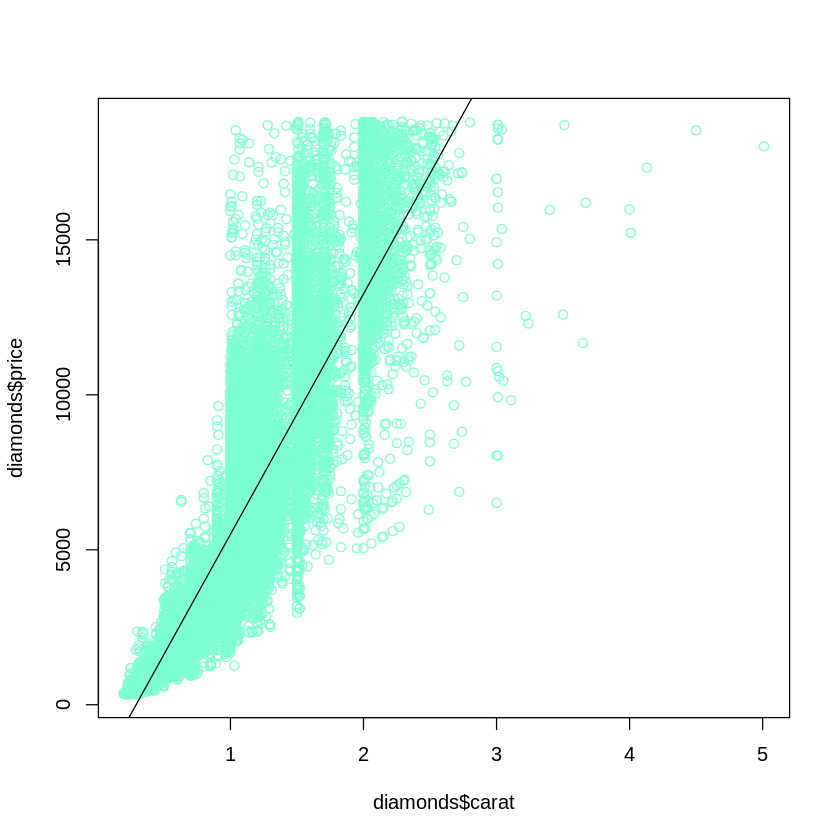

In [43]:
plot(diamonds$carat, diamonds$price, col=c("aquamarine"))
abline(fit_simple)

Diagnostic plot:

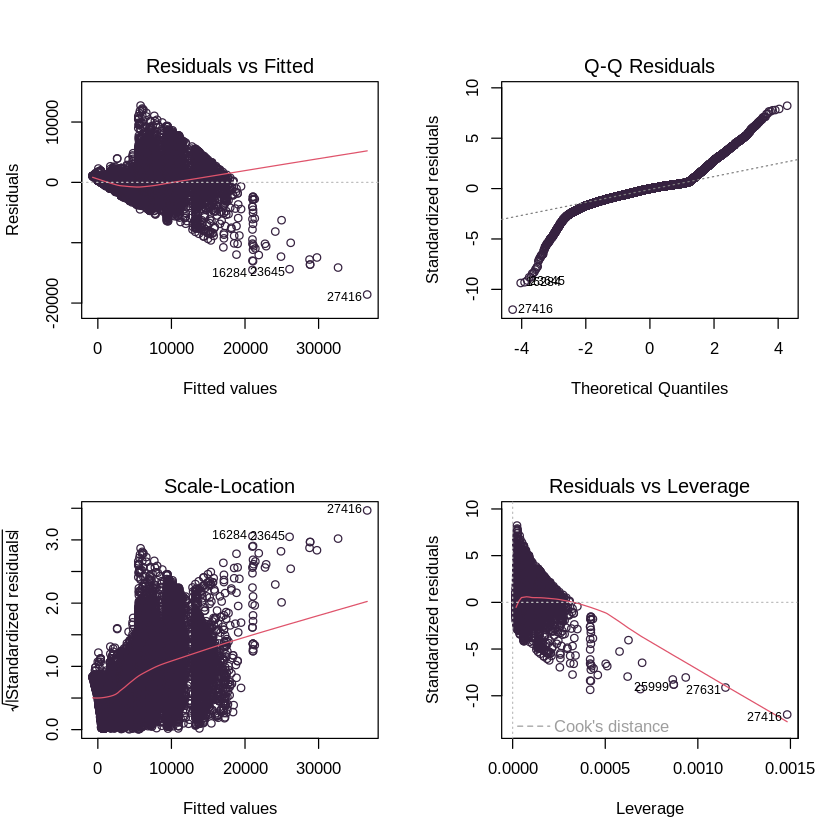

In [51]:
par(mfrow = c(2, 2))
plot(fit_simple, col="#362240")

Leverage statistic:

27416 
27416

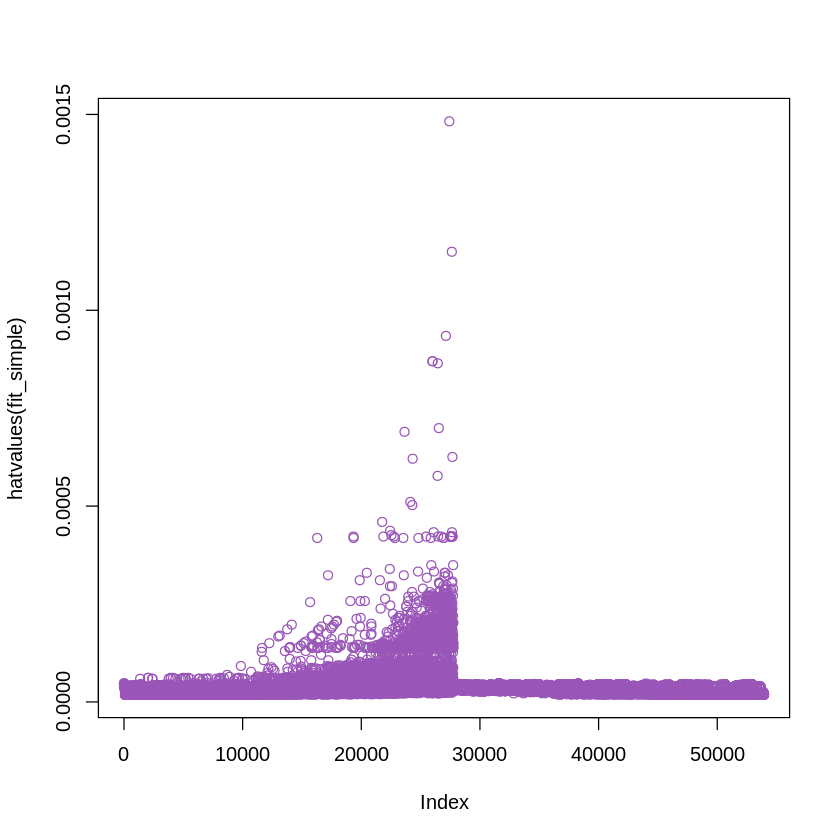

In [49]:
plot(hatvalues(fit_simple), col="#9956b8")
which.max(hatvalues(fit_simple))

## Multiple regression

Multiple regression model is expresse by the formula:
$$Y=β0+β1X1+β2X2+β3X3+ϵ$$

Let's preform multiple regression using features: `carat` and `table` (width of top of diamond relative to widest point (43--95)  and predicting `price`.

In [54]:
fit_la <- lm(price ~ carat + table, data=diamonds)
summary(fit_la)


Call:
lm(formula = price ~ carat + table, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-18738.6   -795.2    -30.1    529.0  12608.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1961.992    171.811   11.42   <2e-16 ***
carat       7820.038     14.225  549.74   <2e-16 ***
table        -74.301      3.018  -24.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1540 on 53937 degrees of freedom
Multiple R-squared:  0.851,	Adjusted R-squared:  0.851 
F-statistic: 1.54e+05 on 2 and 53937 DF,  p-value: < 2.2e-16


Regression using all feratures can also be performed:

In [55]:
fit_all <- lm(price ~ ., data = diamonds)
summary(fit_all)


Call:
lm(formula = price ~ ., data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-21361.9   -599.8   -175.1    382.8  10669.4 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.417e+03  4.103e+02   3.455 0.000551 ***
X             5.364e-03  3.449e-04  15.554  < 2e-16 ***
carat         1.118e+04  4.875e+01 229.366  < 2e-16 ***
cutGood       5.944e+02  3.353e+01  17.726  < 2e-16 ***
cutIdeal      8.413e+02  3.334e+01  25.235  < 2e-16 ***
cutPremium    7.727e+02  3.216e+01  24.023  < 2e-16 ***
cutVery Good  7.410e+02  3.218e+01  23.026  < 2e-16 ***
colorE       -2.118e+02  1.785e+01 -11.863  < 2e-16 ***
colorF       -2.750e+02  1.805e+01 -15.232  < 2e-16 ***
colorG       -4.850e+02  1.768e+01 -27.438  < 2e-16 ***
colorH       -9.760e+02  1.880e+01 -51.926  < 2e-16 ***
colorI       -1.470e+03  2.112e+01 -69.593  < 2e-16 ***
colorJ       -2.373e+03  2.607e+01 -91.027  < 2e-16 ***
clarityIF     5.339e+03  5.091e+01 104.862  < 2e-

The confidence set for two coefficients can be calculated using, for example, the `ellipse()` function from the ellipse package.

In [57]:
install.packages("ellipse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



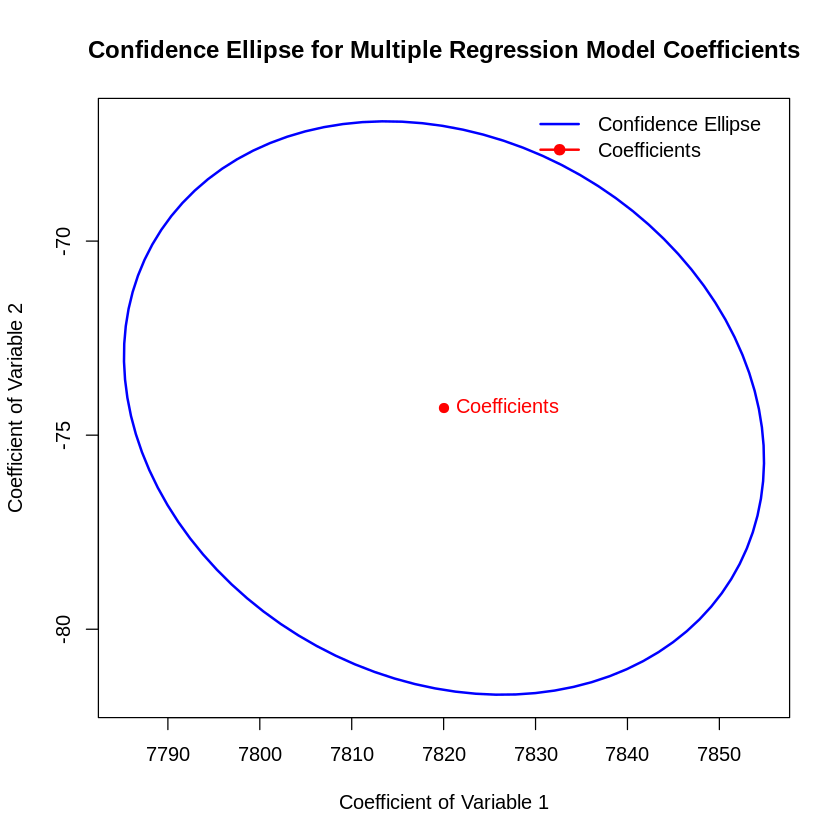

In [60]:
# Load necessary library
library(ellipse)


# Plot the confidence ellipse
plot(ellipse(fit_la, which = -1), type = "l", col = "blue", lwd = 2,
     xlab = "Coefficient of Variable 1", ylab = "Coefficient of Variable 2",
     main = "Confidence Ellipse for Multiple Regression Model Coefficients")

# Extract coefficients
la_coefs <- coef(fit_la)

# Add points for the coefficients with color
points(la_coefs[2], la_coefs[3], col = "red", pch = 19)

# Add text labels for the points
text(la_coefs[2], la_coefs[3], labels = "Coefficients", pos = 4, col = "red")

# Optional: Add a legend for clarity
legend("topright", legend = c("Confidence Ellipse", "Coefficients"),
       col = c("blue", "red"), lwd = 2, pch = c(NA, 19), bty = "n")


## Interactions between variables
The presence of the component $X1⋅X2$ is marked in the formula by the member $X1 : X2$. The syntax $X1 * X2$ is an abbreviation for $X1 + X2 + X1:X2$

In [62]:
summary(lm(price ~ carat * table, data=diamonds))


Call:
lm(formula = price ~ carat * table, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-18592.3   -797.2    -28.4    534.6  12592.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  663.841    339.456   1.956   0.0505 .  
carat       9419.466    361.011  26.092  < 2e-16 ***
table        -51.706      5.922  -8.731  < 2e-16 ***
carat:table  -27.722      6.252  -4.434 9.27e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1540 on 53936 degrees of freedom
Multiple R-squared:  0.8511,	Adjusted R-squared:  0.8511 
F-statistic: 1.027e+05 on 3 and 53936 DF,  p-value: < 2.2e-16


## Nonlinear predictor transformations
Model with quadratic dependence on `price`, i.e.
$$ price = β0+β1⋅carat+β2⋅carat^2+ϵ$$
is adjusted as follows (the `I()` function is necessary due to the special meaning of the ^ operator in the formulas):

In [64]:
fit_l2 <- lm(price ~ carat + I(carat^2), data=diamonds)
summary(fit_l2)


Call:
lm(formula = price ~ carat + I(carat^2), data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-26350.0   -724.2    -35.9    445.8  12881.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1832.58      21.69   -84.5   <2e-16 ***
carat        6677.03      46.40   143.9   <2e-16 ***
I(carat^2)    507.91      20.82    24.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1540 on 53937 degrees of freedom
Multiple R-squared:  0.851,	Adjusted R-squared:  0.851 
F-statistic: 1.54e+05 on 2 and 53937 DF,  p-value: < 2.2e-16


The `fit_simple` and `fit_l2` models can be compared by comparing the *RSE* and *R2*. The `anova()` function performs a statistical test in which the null hypothesis is equal fit.

In [66]:
anova(fit_simple, fit_l2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,53938,129345695398,NA,NA,NA,NA
2,53937,127934024108,1,1411671290,595.1608,9.695712e-131


Higher degree polynomial regression can use the `poly()` function:

In [67]:
fit_l5 <- lm(price ~ poly(carat, 5), data=diamonds)
summary(fit_l5)


Call:
lm(formula = price ~ poly(carat, 5), data = diamonds)

Residuals:
    Min      1Q  Median      3Q     Max 
-9973.1  -402.6   -60.2   265.0 13086.0 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.933e+03  6.194e+00 634.926   <2e-16 ***
poly(carat, 5)1  8.539e+05  1.439e+03 593.564   <2e-16 ***
poly(carat, 5)2  3.757e+04  1.439e+03  26.118   <2e-16 ***
poly(carat, 5)3 -1.099e+05  1.439e+03 -76.401   <2e-16 ***
poly(carat, 5)4  6.386e+04  1.439e+03  44.388   <2e-16 ***
poly(carat, 5)5  1.263e+04  1.439e+03   8.776   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1439 on 53934 degrees of freedom
Multiple R-squared:   0.87,	Adjusted R-squared:   0.87 
F-statistic: 7.218e+04 on 5 and 53934 DF,  p-value: < 2.2e-16


Logarithic transformation of the predictor:

In [73]:
summary(lm(price ~ log(carat), data=diamonds))


Call:
lm(formula = price ~ log(carat), data = diamonds)

Residuals:
    Min      1Q  Median      3Q     Max 
-6137.4 -1495.1  -328.3  1141.9 12075.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6237.84      10.73   581.2   <2e-16 ***
log(carat)   5836.02      15.21   383.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2066 on 53938 degrees of freedom
Multiple R-squared:  0.7319,	Adjusted R-squared:  0.7319 
F-statistic: 1.473e+05 on 1 and 53938 DF,  p-value: < 2.2e-16


## Qualitative predictors

Qualitative variables are automatically encoded. The `contrasts()` function shows the encoding used by R for qualitative variables.

In [78]:
diamonds_qual_fit <- lm(price ~ . + cut:clarity, data = diamonds)
summary(diamonds_qual_fit)


Call:
lm(formula = price ~ . + cut:clarity, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-21180.7   -587.7   -176.9    374.2  10086.7 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.110e+03  4.161e+02   2.668 0.007625 ** 
X                         5.456e-03  3.441e-04  15.855  < 2e-16 ***
carat                     1.122e+04  4.870e+01 230.436  < 2e-16 ***
cutGood                   1.103e+03  1.391e+02   7.927 2.29e-15 ***
cutIdeal                  1.694e+03  1.227e+02  13.799  < 2e-16 ***
cutPremium                7.900e+02  1.117e+02   7.075 1.51e-12 ***
cutVery Good              9.638e+02  1.458e+02   6.610 3.87e-11 ***
colorE                   -2.127e+02  1.779e+01 -11.953  < 2e-16 ***
colorF                   -2.717e+02  1.800e+01 -15.096  < 2e-16 ***
colorG                   -4.821e+02  1.763e+01 -27.343  < 2e-16 ***
colorH                   -9.746e+02  1.875e+01 -51.984  < 2e-16 ***
col